# Mastermind

**Mastermind** is a classic code-breaking game that involves one player, called the code maker, creating a secret code and another player, called the code breaker, trying to guess the code. The game is played as follows:

   - The code maker creates a code of four colored pegs (or more depending on the variant) from a set of six different colors (e.g., red, blue, green, yellow, purple, and orange).

   - The code breaker then attempts to guess the code by placing four colored pegs in a row on the board.

   - The code maker then provides feedback to the code breaker by placing smaller black and white pegs on the board. A black peg indicates that one of the guessed colors is both in the correct position and part of the secret code. A white peg indicates that one of the guessed colors is part of the secret code, but not in the correct position.

   - The code breaker continues to make guesses and receive feedback from the code maker until they successfully guess the code or run out of guesses.

Here are the basic rules to play **Mastermind**:

   - The code maker creates a secret code using four colored pegs.

   - The code breaker has 10 attempts to guess the code.

   - The code breaker places four colored pegs in a row on the board to make a guess.

   - The code maker provides feedback to the code breaker by placing smaller black and white pegs on the board.

   - A black peg indicates that one of the guessed colors is both in the correct position and part of the secret code.

   - A white peg indicates that one of the guessed colors is part of the secret code, but not in the correct position.

   - The code breaker continues to make guesses and receive feedback from the code maker until they successfully guess the code or run out of guesses.

The game can be played in different variations depending on the number of colors and positions.

In [1]:
import time
import random
import pygad
from tabulate import tabulate

In [2]:
# generator and helper functions

# function to generate an empty board
def generate_empty_board(length):
    board = [[0 for j in range(length)] for i in range(10)]
    return board


# function to generate a random code out of 8 different numbers (colors)
def generate_code(length):
    code = []
    for i in range(length):
        code.append(random.randint(0, 7))
    return code


# function to convert a numpy array to a list
def convert_nda_to_list(nda):
    return [int(nda[i]) for i in range(len(nda))]

## Functions related to game logic

In [3]:
# function that checks the guess and returns the score
def check_guess(code, guess, length):
    correct = 0
    misplaced = 0
    for i in range(length):
        if guess[i] == code[i]:
            correct += 1
        elif guess[i] in code:
            misplaced += 1
    return correct, misplaced


# function that fills the board with guesses and returns the score, stops when the code is guessed
def solve_mastermind(code, length, solution, board):
    # convert the solution to a list, by default it is a numpy array
    solution = convert_nda_to_list(solution)
    score = 0
    start = 0
    end = length - 1

    for i in range(len(board)):
        # every time the guess is wrong, the score is reduced by 100
        score -= 100
        board[i] = solution[start : end + 1]
        # update the start and end indices after each guess
        start, end = end + 1, end + length
        correct, misplaced = check_guess(code, board[i], length)
        score += correct * 10 + misplaced
        if correct == length:
            break
    return score

## Constant parameters

In [4]:
# our gene space consists of 8 different numbers (colors)
gene_space = [0, 1, 2, 3, 4, 5, 6, 7]

# number of solutions/chromosomes within the population
sol_per_pop = 300

# number of solutions to be selected as parents
num_parents_mating = sol_per_pop // 2

# number of generations in the solution/chromosome
num_generations = 500

# number of parents to keep in the current population
keep_parents = sol_per_pop // 15

# type of parent selection (sss = stochastic sampling selection)
parent_selection_type = "sss"

# crossover type to be used for mating between parents (single point crossover)
crossover_type = "single_point"


## Fitness function

```python
def fitness_func(ga_instance, solution, solution_idx):
    board = generate_empty_board(length_of_input)
    fitness = 0

    fitness = solve_mastermind(correct_code_small, length_of_input, solution, board)
    
    return fitness + 100
```

Our fitness function will firstly generate an empty board and then use the solve_mastermind to calculate the fitness value of current soluton

We're adding 100 to fitness value just for convenience

## Small inputs (board with 4 positions)

We will run the algorithm with 3 different inputs and display results of each instance

Input # 1
Correct code:  [1, 5, 3, 3]
Parameters of the best solution : [1. 5. 3. 3. 7. 2. 0. 3. 2. 1. 0. 3. 0. 2. 3. 7. 4. 7. 4. 3. 3. 2. 4. 6.
 1. 5. 4. 3. 5. 7. 3. 4. 6. 7. 4. 2. 7. 3. 5. 5.]
Fitness value of the best solution = 40
Number of generations passed is 1


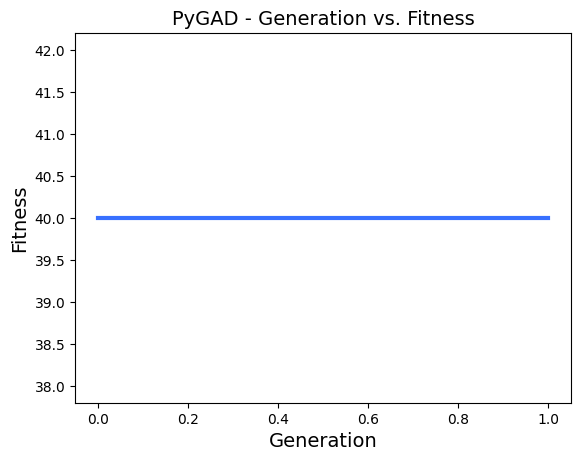

--------------------------------------------------
Input # 2
Correct code:  [7, 0, 2, 0]
Parameters of the best solution : [7. 0. 2. 0. 2. 2. 3. 0. 6. 6. 1. 2. 7. 0. 2. 1. 6. 2. 5. 7. 5. 0. 2. 3.
 3. 0. 2. 2. 4. 4. 2. 2. 7. 5. 1. 1. 2. 1. 5. 0.]
Fitness value of the best solution = 40
Number of generations passed is 5


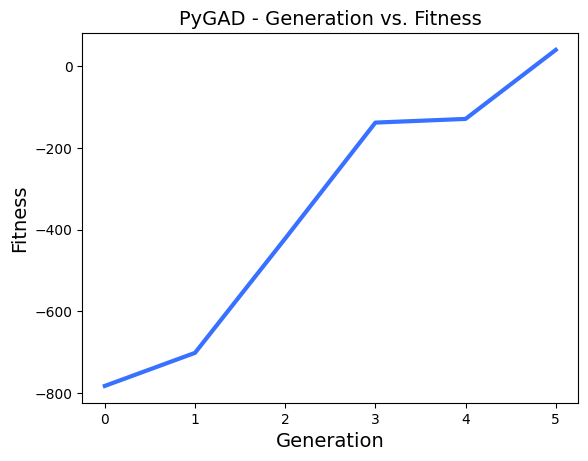

--------------------------------------------------
Input # 3
Correct code:  [1, 6, 4, 3]
Parameters of the best solution : [1. 6. 4. 3. 6. 2. 7. 4. 7. 1. 5. 0. 4. 4. 5. 4. 3. 0. 4. 7. 0. 4. 3. 2.
 6. 1. 5. 5. 4. 7. 2. 1. 4. 2. 2. 0. 7. 5. 0. 5.]
Fitness value of the best solution = 40
Number of generations passed is 1


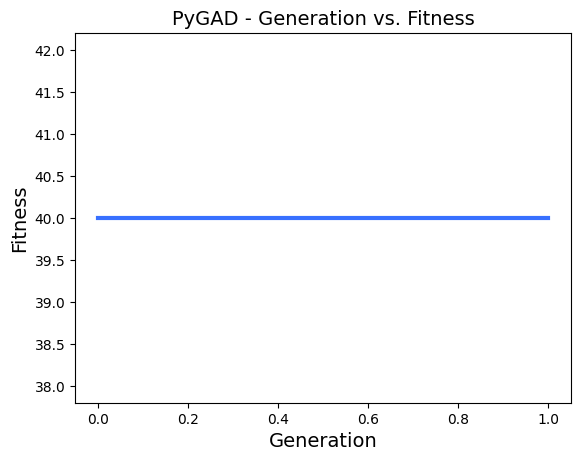

--------------------------------------------------


In [5]:
def fitness_func(ga_instance, solution, solution_idx):
    board = generate_empty_board(4)
    fitness = 0

    fitness = solve_mastermind(correct_code_small, 4, solution, board)
    
    return fitness + 100


# run the algorithm 3 times on 3 different codes
for k in range(3):
    correct_code_small = generate_code(4)
    print("Input #", k+1)
    print("Correct code: ", correct_code_small)

    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=40, # number of genes in each solution is 40 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            stop_criteria=["reach_40"]) # algorithm stops when a solution with fitness 40 is found

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
    ga_instance.plot_fitness()
    print("--------------------------------------------------")


## Testing for small inputs

We will run the algorithm 100 times with the same input to check the average time and precision of each instance

In [6]:
# variables to store the number of perfect solutions found and the total time it took to solve them
small_perfect_attempts = 0
small_time_passed = 0

correct_code_small = generate_code(4)

print("Correct code: ", correct_code_small)

# run the algorithm 100 times and calculate the average time it takes to solve the board every time a perfect solution is found
for i in range(100):
    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=40, # number of genes in each solution is 40 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            stop_criteria=["reach_40"]) # algorithm stops when a solution with fitness 40 is found

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    # if the solution is perfect, add the time it took to solve to the total time
    if solution_fitness == 40:
        small_time_passed += end_time - start_time
        small_perfect_attempts += 1

print("Perfect attempts: ", small_perfect_attempts, "out of 100")
print("Average time: ", small_time_passed / small_perfect_attempts)

Correct code:  [3, 6, 2, 5]
Perfect attempts:  100 out of 100
Average time:  0.14949828147888183


## Medium inputs (board with 7 positions)

We will run the algorithm with 3 different inputs and display results of each instance

Input # 1
Correct code:  [3, 3, 2, 7, 3, 5, 5]
Parameters of the best solution : [3. 3. 2. 7. 3. 5. 5. 1. 1. 1. 6. 0. 6. 3. 2. 4. 2. 4. 6. 3. 5. 5. 7. 1.
 3. 4. 1. 1. 7. 1. 2. 6. 3. 5. 6. 3. 0. 0. 4. 0. 2. 0. 3. 1. 0. 7. 6. 3.
 3. 6. 2. 2. 7. 3. 5. 3. 1. 3. 7. 7. 7. 2. 5. 3. 2. 5. 5. 0. 5. 7.]
Fitness value of the best solution = 70
Number of generations passed is 18


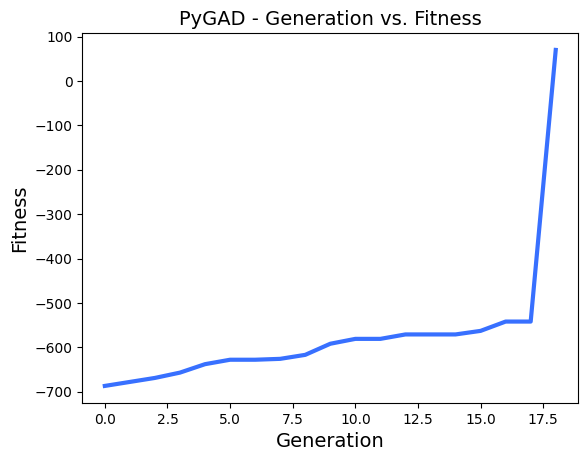

--------------------------------------------------
Input # 2
Correct code:  [3, 6, 7, 4, 3, 6, 6]
Parameters of the best solution : [3. 6. 7. 4. 3. 6. 6. 5. 6. 7. 4. 7. 1. 1. 3. 6. 7. 1. 4. 3. 2. 2. 4. 6.
 0. 3. 7. 7. 6. 3. 5. 6. 3. 6. 3. 7. 5. 3. 5. 3. 3. 6. 3. 7. 3. 6. 0. 7.
 6. 2. 6. 3. 6. 3. 0. 6. 3. 6. 6. 1. 3. 6. 6. 3. 3. 6. 7. 3. 1. 6.]
Fitness value of the best solution = 70
Number of generations passed is 27


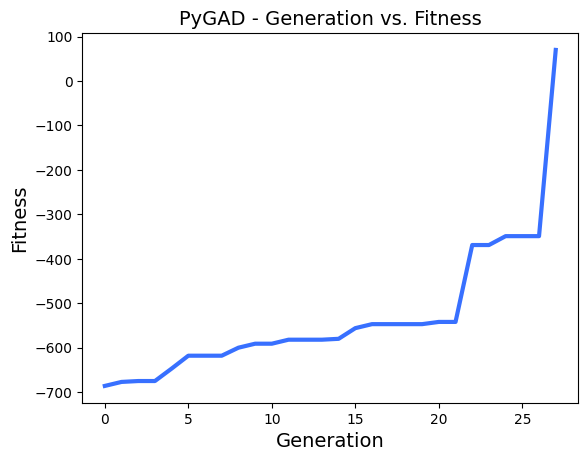

--------------------------------------------------
Input # 3
Correct code:  [1, 4, 3, 5, 7, 2, 3]
Parameters of the best solution : [1. 4. 3. 5. 7. 2. 3. 6. 4. 6. 5. 4. 2. 3. 5. 4. 0. 0. 3. 2. 3. 3. 1. 1.
 5. 7. 6. 4. 1. 0. 6. 2. 2. 1. 3. 1. 5. 4. 3. 7. 5. 0. 1. 1. 1. 4. 7. 3.
 7. 1. 0. 4. 4. 7. 5. 7. 7. 2. 1. 6. 0. 2. 3. 5. 5. 3. 2. 7. 2. 3.]
Fitness value of the best solution = 70
Number of generations passed is 12


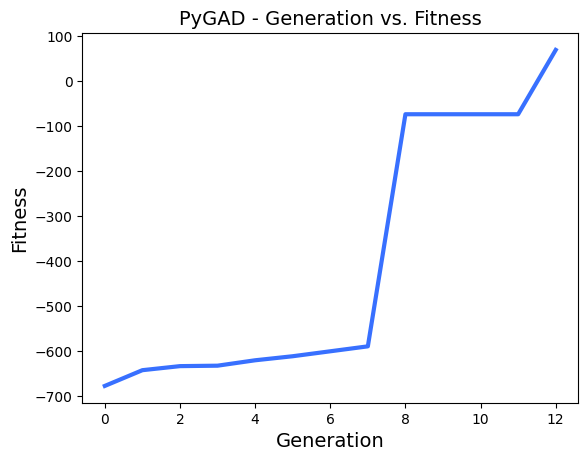

--------------------------------------------------


In [7]:
def fitness_func(ga_instance, solution, solution_idx):
    board = generate_empty_board(7)
    fitness = 0

    fitness = solve_mastermind(correct_code_small, 7, solution, board)
    
    return fitness + 100


# run the algorithm 3 times on 3 different codes
for k in range(3):
    correct_code_small = generate_code(7)
    print("Input #", k+1)
    print("Correct code: ", correct_code_small)

    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=70, # number of genes in each solution is 70 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            stop_criteria=["reach_70"]) # algorithm stops when a solution with fitness 70 is found

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
    ga_instance.plot_fitness()
    print("--------------------------------------------------")


## Testing for medium inputs

We will run the algorithm 100 times with the same input to check the average time and precision of each instance

In [8]:
# variables to store the number of perfect solutions found and the total time it took to solve them
medium_perfect_attempts = 0
medium_time_passed = 0

correct_code_medium = generate_code(7)
print("Correct code: ", correct_code_medium)

# run the algorithm 100 times and calculate the average time it takes to solve the board every time a perfect solution is found
for i in range(100):
    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=70, # number of genes in each solution is 70 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            stop_criteria=["reach_70"]) # algorithm stops when a solution with fitness 70 is found

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    # if the solution is perfect, add the time it took to solve to the total time
    if solution_fitness == 70:
        medium_time_passed += end_time - start_time
        medium_perfect_attempts += 1

print("Perfect attempts: ", medium_perfect_attempts, "out of 100")
print("Average time: ", medium_time_passed / medium_perfect_attempts)

Correct code:  [3, 2, 3, 7, 1, 3, 7]
Perfect attempts:  100 out of 100
Average time:  0.8412266302108765


## Large inputs (board with 10 positions)

We will run the algorithm with 3 different inputs and display results of each instance

Input # 1
Correct code:  [1, 5, 1, 1, 2, 1, 1, 6, 5, 0]
Parameters of the best solution : [1. 5. 1. 1. 2. 1. 1. 6. 5. 0. 1. 6. 6. 3. 0. 4. 3. 6. 5. 7. 3. 0. 1. 0.
 0. 5. 2. 7. 5. 6. 0. 5. 1. 1. 1. 1. 2. 6. 6. 7. 2. 5. 3. 2. 6. 6. 3. 1.
 0. 4. 4. 0. 6. 1. 0. 0. 7. 6. 2. 3. 0. 4. 3. 1. 2. 7. 1. 3. 2. 1. 0. 4.
 1. 6. 4. 2. 5. 6. 6. 6. 0. 7. 1. 0. 5. 5. 3. 2. 5. 2. 7. 1. 1. 1. 7. 1.
 1. 6. 1. 2.]
Fitness value of the best solution = 100
Number of generations passed is 437


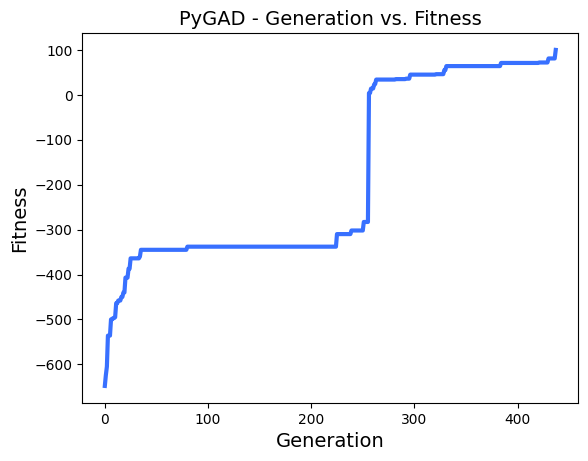

--------------------------------------------------
Input # 2
Correct code:  [1, 6, 5, 6, 4, 0, 3, 0, 4, 5]
Parameters of the best solution : [1. 6. 5. 6. 4. 0. 3. 0. 4. 5. 3. 5. 7. 5. 0. 0. 4. 4. 6. 5. 5. 1. 1. 7.
 0. 0. 5. 0. 7. 5. 1. 3. 3. 6. 3. 4. 2. 3. 2. 5. 1. 1. 1. 4. 1. 2. 0. 0.
 3. 4. 6. 6. 4. 2. 5. 4. 2. 0. 1. 5. 1. 0. 5. 5. 6. 3. 1. 2. 6. 0. 7. 6.
 0. 7. 7. 0. 7. 6. 1. 3. 7. 7. 4. 4. 1. 2. 1. 0. 5. 5. 1. 7. 0. 4. 4. 0.
 4. 0. 4. 0.]
Fitness value of the best solution = 100
Number of generations passed is 194


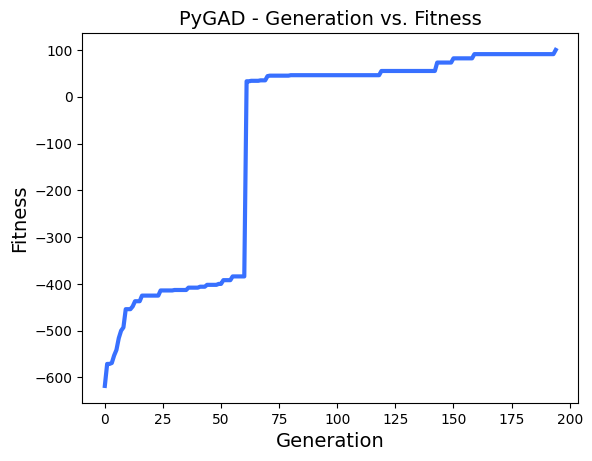

--------------------------------------------------
Input # 3
Correct code:  [2, 0, 1, 6, 1, 2, 2, 0, 3, 1]
Parameters of the best solution : [2. 7. 0. 6. 5. 6. 6. 3. 3. 2. 3. 0. 7. 6. 1. 2. 3. 2. 3. 1. 2. 0. 0. 2.
 1. 2. 2. 0. 3. 3. 2. 0. 1. 7. 1. 0. 2. 3. 3. 4. 2. 0. 1. 6. 1. 2. 2. 0.
 3. 1. 0. 1. 4. 5. 6. 6. 6. 4. 0. 2. 0. 4. 3. 1. 1. 5. 3. 4. 0. 5. 2. 7.
 4. 6. 6. 0. 0. 3. 1. 5. 3. 2. 0. 0. 6. 5. 0. 4. 2. 2. 7. 0. 5. 5. 7. 3.
 5. 7. 2. 3.]
Fitness value of the best solution = -67
Number of generations passed is 500


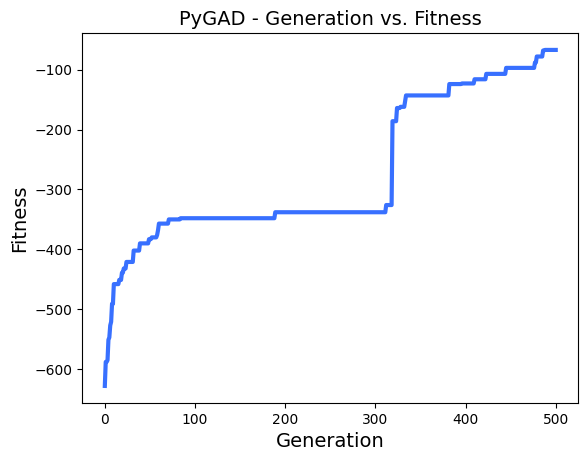

--------------------------------------------------


In [9]:
def fitness_func(ga_instance, solution, solution_idx):
    board = generate_empty_board(10)
    fitness = 0

    fitness = solve_mastermind(correct_code_small, 10, solution, board)
    
    return fitness + 100


# run the algorithm 3 times on 3 different codes
for k in range(3):
    correct_code_small = generate_code(10)
    print("Input #", k+1)
    print("Correct code: ", correct_code_small)

    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=100, # number of genes in each solution is 100 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            stop_criteria=["reach_100"]) # algorithm stops when a solution with fitness 100 is found

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    print("Parameters of the best solution : {solution}".format(solution=solution))
    print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
    print("Number of generations passed is {generations_completed}".format(generations_completed=ga_instance.generations_completed))
    ga_instance.plot_fitness()
    print("--------------------------------------------------")


## Testing for large inputs

We will run the algorithm 100 times with the same input to check the average time and precision of each instance

In [10]:
# variables to store the number of perfect solutions found and the total time it took to solve them
large_perfect_attempts = 0
large_time_passed = 0

correct_code_large = generate_code(10)
print("Correct code: ", correct_code_large)

# run the algorithm 100 times and calculate the average time it takes to solve the board every time a perfect solution is found
for i in range(100):
    ga_instance = pygad.GA( gene_space=gene_space,
                            num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_func,
                            sol_per_pop=sol_per_pop,
                            num_genes=100, # number of genes in each solution is 100 to fill in whole board
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            # algorithm stops when a solution with fitness 100 is found
                            stop_criteria=["reach_100"])
    

    start_time = time.time()
    ga_instance.run()
    end_time = time.time()
    
    solution, solution_fitness, solution_idx = ga_instance.best_solution()
    
    # if the solution is perfect, add the time it took to solve to the total time
    if solution_fitness == 100:
        large_time_passed += end_time - start_time
        large_perfect_attempts += 1

print("Perfect attempts: ", large_perfect_attempts, "out of 100")
print("Average time: ", large_time_passed / large_perfect_attempts)

Correct code:  [7, 2, 1, 4, 4, 0, 6, 7, 0, 0]
Perfect attempts:  81 out of 100
Average time:  9.606845902807919


In [12]:
table = [["Board size", "Average time", "Perfect attempts"],
          ["4", small_time_passed / small_perfect_attempts, str(small_perfect_attempts) + " / 100"],
          ["7", medium_time_passed / medium_perfect_attempts, str(medium_perfect_attempts) + " / 100"],
          ["10", large_time_passed / large_perfect_attempts, str(large_perfect_attempts) + " / 100"]]

print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒══════════════╤════════════════╤════════════════════╕
│   Board size │   Average time │ Perfect attempts   │
╞══════════════╪════════════════╪════════════════════╡
│            4 │       0.149498 │ 100 / 100          │
├──────────────┼────────────────┼────────────────────┤
│            7 │       0.841227 │ 100 / 100          │
├──────────────┼────────────────┼────────────────────┤
│           10 │       9.60685  │ 81 / 100           │
╘══════════════╧════════════════╧════════════════════╛


## Conclusions

Analyzing the results, we can conclude that genetic algorithm with our fitness function is able to solve the mastermind game with small and medium inputs with ease, with larger inputs the precision drops to around 80%

## Bibliography

- https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html

- https://en.wikipedia.org/wiki/Mastermind_(board_game)